In [40]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

## local tree:
# http://localhost:8888/tree/data-um-sync/training/coursera-work/python-for-data-science-edx/week-05-visualization


<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Step 1: Initial exploration of the Dataset

In [41]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [42]:
## download data

import urllib3
import shutil

url = "https://www.kaggle.com/worldbank/world-development-indicators/downloads/world-development-indicators.zip/2"
c = urllib3.PoolManager()
filename = 'world-development-indicators.zip'

## download file using urllib3:

#with c.request('GET', url, preload_content = False) as resp, open(filename, 'wb') as out_file:
#    shutil.copyfileobj(resp, out_file)


#urllib.request.urlretrieve(url) 
#os.getcwd()


In [43]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [44]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


Looks like it has different indicators for different countries with the year and value of the indicator. 

### How many UNIQUE country names are there ?

In [45]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [46]:
tmp = data['CountryName'].unique()
type(tmp) ## numpy.ndarray
len(tmp) ## 247
tmp[:5]


array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics',
       'East Asia & Pacific (all income levels)',
       'East Asia & Pacific (developing only)'], dtype=object)

### Are there same number of country codes ?

In [47]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

### Are there many indicators or few ?

In [48]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [49]:
data["IndicatorName"].unique().tolist()[:20]

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'Hospital beds (per 1,000 people)',
 'International migrant stock (% of population)',
 'International migrant stock, total']

### How many years of data do we have ?

In [50]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

### What's the range of years?

In [51]:
print(min(years)," to ",max(years))

1960  to  2015


<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 1</p><br>

### Lets pick a country and an indicator to explore: CO2 Emissions per capita and the USA

In [52]:
# select CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]

In [53]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


### Let's see how emissions have changed over time using MatplotLib

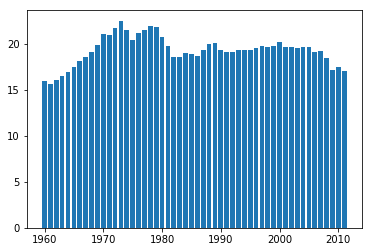

In [54]:
# get the years
years = stage['Year'].values
# get the values 
co2 = stage['Value'].values

# create
plt.bar(years,co2)
plt.show()

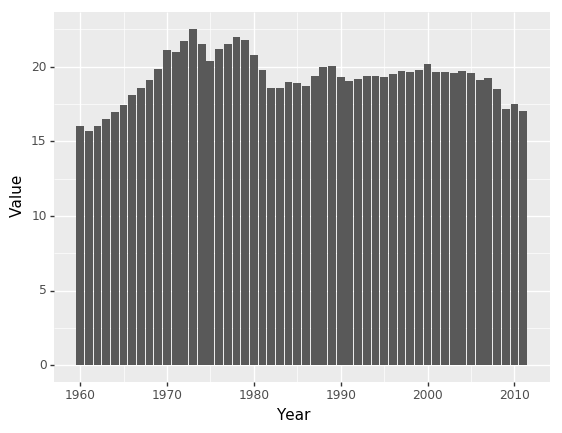

<ggplot: (-9223372029243129221)>

In [55]:
# import plotnine  ## ggplot implementation
from plotnine import *
from plotnine.data import *

ggplot(stage, aes(x = "Year", y = "Value")) +\
  geom_bar(stat = "identity")


Turns out emissions per capita have dropped a bit over time, but let's make this graphic a bit more appealing before we continue to explore it.

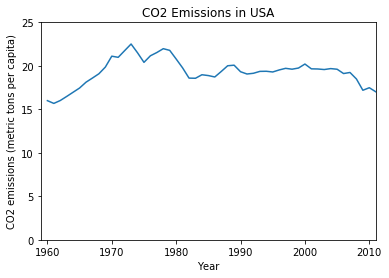

In [56]:
# switch to a line plot
# (plt.plot is a line plot)
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,25])

plt.show()

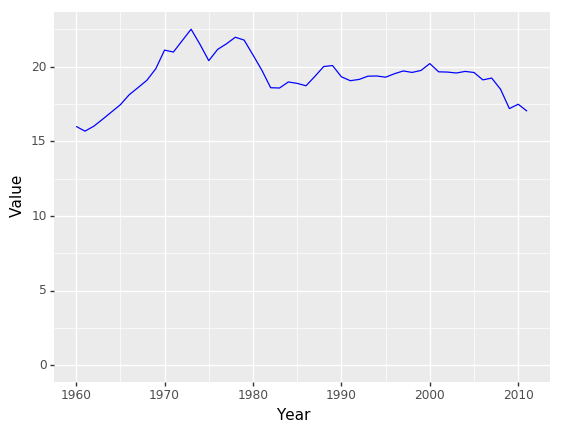

<ggplot: (7611573971)>

In [57]:
ggplot(stage, aes(x = "Year", y = "Value")) +\
  geom_line(color = "blue") +\
  coord_cartesian(ylim=[0, stage["Value"].max()])

### Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year. 

In [58]:
# If you want to just include those within one standard deviation fo the mean, you could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [59]:
print(len(hist_data))
print(hist_data[:20])
print(hist_data.min())
print(hist_data.max())

52
[15.99977916 15.68125552 16.0139375  16.48276215 16.96811858 17.45172525
 18.12107301 18.59831788 19.08938916 19.85794566 21.11125227 20.98020348
 21.74864198 22.51058213 21.50293038 20.40222407 21.15761537 21.53248401
 21.97300469 21.78043698]
15.6812555160569
22.510582127233896


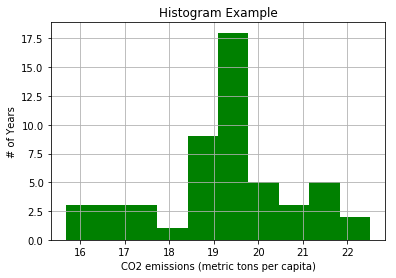

In [60]:
# the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

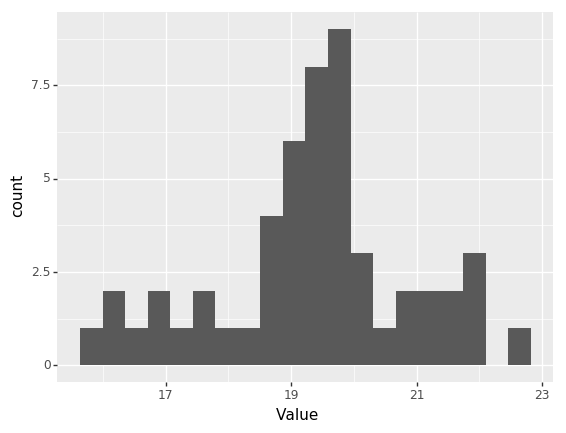

<ggplot: (7611587350)>

In [61]:
## pretty slow! (huge number of bins by default)
ggplot(stage, aes(x = "Value")) + geom_histogram(bins = 20)

So the USA has many years where it produced between 19-20 metric tons per capita with outliers on either side.

### But how do the USA's numbers relate to those of other countries?

In [62]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


For how many countries do we have CO2 per capita emissions data in 2011

In [63]:
print(len(co2_2011))

232


/Users/ingonader/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


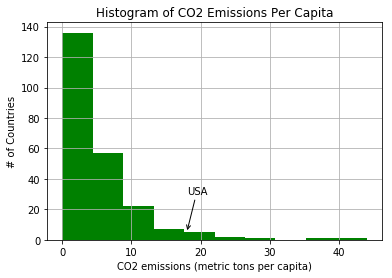

In [64]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

In [65]:
#co2_2011.head()

## add column for color coding (plotnine):
## co2_2011['USA_ind'] = (co2_2011['CountryCode'] == 'USA')
## does not work, as this is a copy of the original dataframe:
#/Users/ingonader/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
#A value is trying to be set on a copy of a slice from a DataFrame.
#Try using .loc[row_indexer,col_indexer] = value instead
#
#See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
#  after removing the cwd from sys.path.

## same for:
## co2_2011['USA_ind'] = np.where(co2_2011['CountryCode'] == 'USA', 'USA', 'Other')

## do so in original dataframe:
data['USA_ind'] = np.where(data['CountryCode'] == 'USA', 'USA', 'Other')
## but co2_2011.head()) is messed up then, or not updated:
print(co2_2011.head())

## need to re-copy the selected dataframe reference?
co2_2011 = data[mask1 & mask2]
co2_2011.head()



                                     CountryName CountryCode  \
5026275                               Arab World         ARB   
5026788                   Caribbean small states         CSS   
5027295           Central Europe and the Baltics         CEB   
5027870  East Asia & Pacific (all income levels)         EAS   
5028456    East Asia & Pacific (developing only)         EAP   

                                  IndicatorName   IndicatorCode  Year  \
5026275  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   
5026788  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   
5027295  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   
5027870  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   
5028456  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   

            Value  
5026275  4.724500  
5026788  9.692960  
5027295  6.911131  
5027870  5.859548  
5028456  5.302499  


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,USA_ind
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500,Other
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960,Other
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131,Other
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548,Other
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499,Other


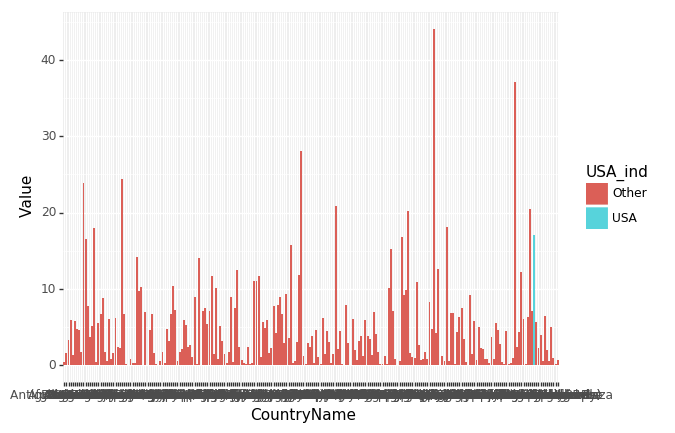

<ggplot: (-9223372036503699687)>

In [69]:
ggplot(co2_2011, aes(y = 'Value', x = 'CountryName', fill = 'USA_ind')) + geom_bar(stat = 'identity')
## not actually what I wanted...

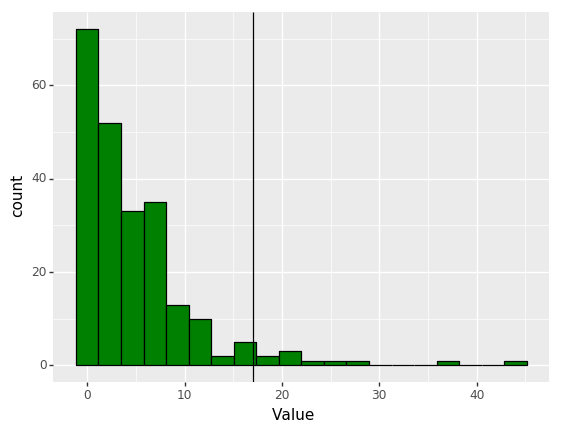

<ggplot: (281726668)>

In [106]:
## pretty slow! (huge number of bins by default)
ggplot(co2_2011, aes(x = "Value")) + \
  geom_histogram(bins = 20, color = "black", fill = "green") + \
  geom_vline(xintercept = co2_2011.loc[co2_2011['CountryCode'] == 'USA', 'Value'].values[0])

# co2_2011.loc[co2_2011['CountryCode'] == 'USA','Value']
# 5194727    17.020216
# Name: Value, dtype: float64
        
# co2_2011.loc[co2_2011['CountryCode'] == 'USA','Value'].values
# array([17.02021634])

# co2_2011.loc[co2_2011['CountryCode'] == 'USA', 'Value'].values[0]
# 17.0202163384029

So the USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries.

An interesting next step, which we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

<p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 2</p>

### Relationship between GPD and CO2 Emissions in USA

In [110]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [111]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,USA_ind
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760,USA
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657,USA


In [112]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


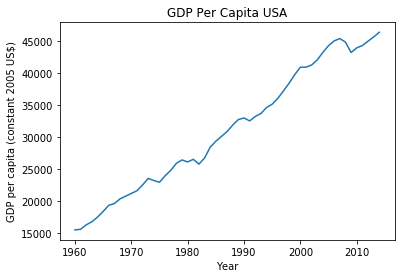

In [32]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

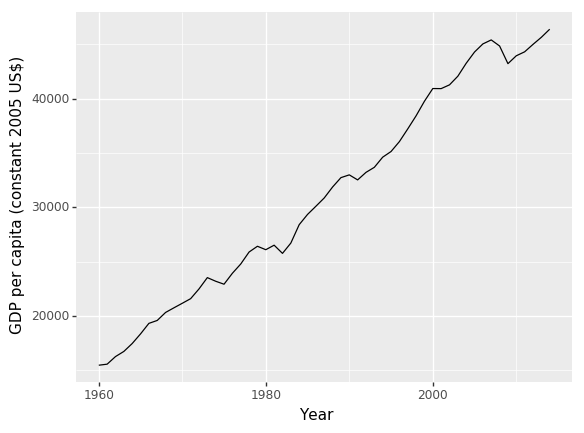

<ggplot: (-9223372036555033284)>

In [129]:
## same using plotnin's ggplot:
ggplot(gdp_stage, aes(y = 'Value', x = 'Year')) + \
  labs(y = gdp_stage.loc[:, 'IndicatorName'].values[0]) + \
  geom_line()



So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [114]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [115]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


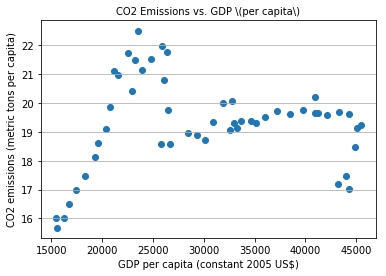

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

   CountryName_x CountryCode                     IndicatorName_x  \
0  United States         USA  GDP per capita (constant 2005 US$)   
1  United States         USA  GDP per capita (constant 2005 US$)   

  IndicatorCode_x  Year       Value_x USA_ind  CountryName_y  \
0  NY.GDP.PCAP.KD  1960  15482.707760     USA  United States   
1  NY.GDP.PCAP.KD  1961  15578.409657     USA  United States   

                          IndicatorName_y IndicatorCode_y    Value_y  
0  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  15.999779  
1  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  15.681256  


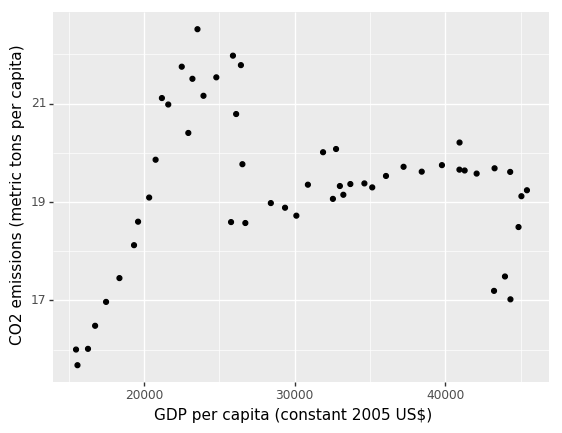

<ggplot: (-9223372036558284007)>

In [144]:
## same with ggplot, and a little more correctly (joining data instead of just relying on order):
stage_merge = gdp_stage.merge(stage, \
                left_on = ['CountryCode', 'Year'], \
                right_on = ['CountryCode', 'Year'])


print(stage_merge.head(2))

ggplot(stage_merge, aes(x = 'Value_x', y = 'Value_y')) + \
  labs(y = stage_merge.loc[:, 'IndicatorName_y'].values[0], \
      x = stage_merge.loc[:, 'IndicatorName_x'].values[0]) + \
  geom_point()

This doesn't look like a strong relationship.  We can test this by looking at correlation.

In [145]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

A correlation of 0.07 is pretty weak, but you'll learn more about correlation in the next course.

You could continue to explore this to see if other countries have a closer relationship between CO2 emissions and GDP.  Perhaps it is stronger for developing countries?

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;